## Parameter Estimation: MLE and MAP

In [6]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy

Read the dataset into `elems` array

In [2]:
# load data from 'parameter_estimation_dataset.txt' file into a variable named "elems"
with open('parameter_estimation_dataset.txt') as f:
    content = f.readlines()
elems = [x.strip() for x in content] 
elems = np.asarray(elems).astype(int)

Visualize data to see if it follows Geometric distribution.<br>
Plot the histogram of `elems` for the `bins`=[0, 5, 10, 20, 30, 40, 50, 60, 100]

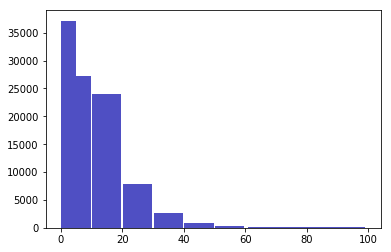

In [3]:
# Plot histogram of elems for the given bins parameter values
bins = [0, 5, 10, 20, 30, 40, 50, 60, 100]
n, bins, patches = plt.hist(x=elems, bins=bins, color='#0504aa',
                               alpha=0.7, rwidth=0.95)

**As shown from the histogram, the data follows geometric distribution.**

#### 1. (8 pts) Maximum Likelihood Estimation

i. (4 pts) We will compute an approximation of the MLE, by just computing the maximum of the log-likelihood function over a given finite set of candidate parameters. Write a function `plotMLE(X, theta)` that takes as input a set of samples, and a set of candidate parameters $\theta$, and produces a plot with the log-likelihood function $\ell(\theta)$ on the Y-axis, candidate parameters $\theta$ on the X-axis, and also mark that candidate parameter $\hat{\theta}$ from the given set of candidate parameters with the maximum log-likelihood (as the approximate MLE).

In [76]:
def plotMLE(X,theta):
    prob = []
    for th in theta:
        p = 0
        for i in X:
            p += np.log(((1 - th) ** i) * th)
        prob.append(p)
    
    log_likelihood =  np.asarray(prob) # compute log-likelihood wrt each theta. It will be an array.
    mle = max(log_likelihood) # find the max of log_likelihood. This will be our mle estimate
    mle_index = np.argmax(log_likelihood) # find the index for which we have mle estimate. 

    X = theta[mle_index] # select the best theta based on mle_index and store it in variable X
    print(mle)
    # plotting
    plt.plot(theta,   log_likelihood,X,mle,'ro',label='mle')
    plt.text(X, mle, r'$\ theta={},mle={}$'.format(X, mle))
    plt.xlabel('Theta ')
    plt.ylabel('Log Likelihood values')
    plt.title('PlotMLE graph')
    plt.show()

ii.  (4 pts) Consider the following sequence of $100000$ samples (stored in `parameter_estimation_dataset.txt`) obtained from Casino Coruscant on number of trials to first win on a slot machine.<br>
    Use your program to produce three plots: (a) with the first ten samples, (b) with the first ten-thousand, and (c) with all hundred-thousand. For each of the three plots, for the set of candidate parameters use ${0.01, 0.02,\ldots,0.99}$. What do you observe from the resulting plots? Does the estimate change across the three plots? If yes, what is its trend?

-36.099361130691214


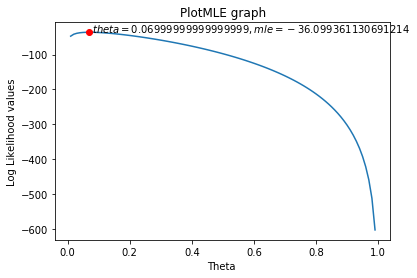

In [77]:
# call plotMLE for first ten elems
plotMLE(elems[:10], theta=np.arange(0.01,1,0.01))

-30559.910323154523


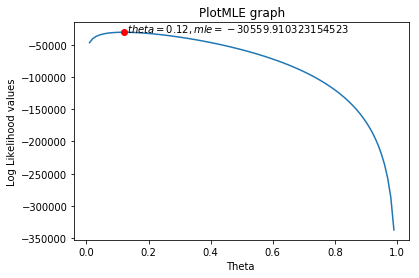

In [78]:
# call plotMLE for first ten-thousand elems for theta = arange(0.01,1,0.01)

plotMLE(elems[:10000], theta=np.arange(0.01, 1, 0.01))

-328644.4749022551


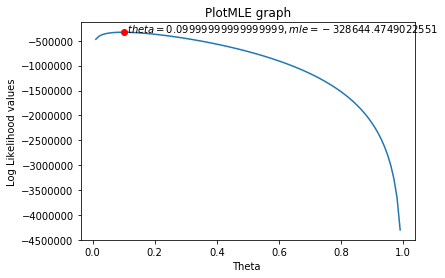

In [79]:
# call plotMLE for all elems for theta = arange(0.01,1,0.01)

plotMLE(elems, theta=np.arange(0.01, 1, 0.01))

**MLE becomes more negative as data points increase. Estimates also change across the three plots. Theta first increases from 0.07 to 0.12 and then decreases from 0.12 to 0.10. The plot all shows a trend of increasingly negative mle with increasing theta. **

#### 2. (12 pts) Maximum a Posteriori Estimation

i. (6 pts) Write a function `plotMAP(X,theta,alpha,beta)` that that takes as input a set of samples, and a set of candidate parameters $\theta$, a value for alpha, and a value for beta, and produces a plot with the log-posterior function $\ell(\theta)$ on the Y-axis, candidate parameters $\theta$ on the X-axis, and also mark that candidate parameter $\hat{\theta}$ from the given set of candidate parameters which has the maximum posterior density (as the approximate MAP). [Note : Use Beta distribution for prior.
    $$
    	Beta(x;\alpha, \beta) = \frac{x^{\alpha - 1} (1-x)^{\beta - 1}}{B(\alpha, \beta)}
    $$, where $B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$ and $\alpha > 0, \beta > 0$.]

In [9]:
from scipy import stats

In [12]:

def plotMAP(X,theta,alpha,beta):    
    prior = stats.beta.pdf(theta,alpha,beta)  # Hint: You can use scipy.stats.beta for computing the prior
    log_posteriori = []  # compute the log posteriori
    counter = 0
    for t in theta:
        p = 0
        for i in X:  
            p += np.log(((1 - t) ** i) * t) + np.log(prior[counter])
        counter += 1
        log_posteriori.append(p)
    
    MAP = max(log_posteriori)  # find the max of log_posteriori. This will be our map estimate
    map_index = np.argmax(log_posteriori) # find the index for which we have map estimate. 

    X = theta[map_index] # select the best theta based on map_index and store it in variable X
    
    # plotting
    plt.plot(theta, log_posteriori,X,MAP,'ro',label='map')
    plt.text(X, MAP, r'$\ theta={},map={}$'.format(X, MAP))
    plt.xlabel('Theta ')
    plt.ylabel('Log Posteriori values')
    plt.title('PlotMAP graph')
    plt.show()

ii. (4 pts) Redo the three plots you made in the previous part, but with the log-posterior function instead, and mark the MAP estimators.  Set $\alpha = 2$, $\beta = 2$.

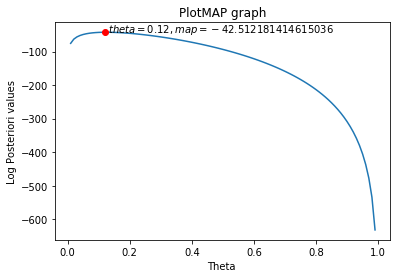

In [13]:
# call plotMAP for first 10 elems for theta=(0.01,1,0.01), and approriate prior parameters

plotMAP(elems[:10], theta=np.arange(0.01,1,0.01), alpha=2, beta=2)

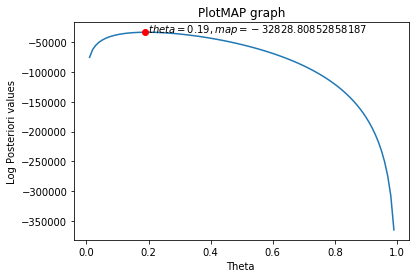

In [14]:
# call plotMAP for first ten thousand elems for theta=(0.01,1,0.01), and approriate prior parameters

plotMAP(elems[:10000], theta=np.arange(0.01,1,0.01), alpha=2, beta=2)

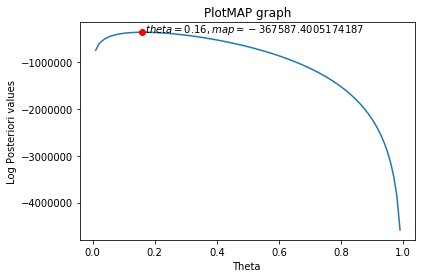

In [15]:
# call plotMAP for all elems for theta=(0.01,1,0.01), and approriate prior parameters

plotMAP(elems, theta=np.arange(0.01,1,0.01), alpha=2, beta=2)

iii. (2 pts) Do you see any significant differences between the MLE and MAP estimates? Why or why not? Explain in 1-2 sentences.

**MAP estimates: theta is larger than in MLE estimates. In MLE estimates, we are maximizing P(x|theta) while in MAP, we are maximizing P(x|theta)P(theta). Incorportating the probability of theta gives us prior knowledge of theta distribution (mean = a/a+b = 0.5). **